In [1]:
pip install PyMuPDF

  Using cached pymupdf-1.25.5-cp39-abi3-win_amd64.whl.metadata (3.4 kB)
Using cached pymupdf-1.25.5-cp39-abi3-win_amd64.whl (16.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install spacy unidecode

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached numpy-2.2.4-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
    --------------------------------------- 0.3/12.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.2 MB 1.9 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/12.2 MB 1.9 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/12.2 MB 2.0 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/12.2 MB 2.0 MB/s eta 0:00:06
   -------- ------------------------------- 2.6/12.2 MB 2.2 MB/s eta 0:00:05
   ---------- ----------------------------- 3.1/12.2 MB 2.3 MB/s eta 0:00:05
   ------------ --------------------------- 3.7/12.2 MB 2.3 MB/s eta 0:00:04
   -------------- ------------------------- 4.5

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.31.0 requires numpy<2,>=1.19.3, but you have numpy 2.2.4 which is incompatible.
tensorflow-intel 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 2.2.4 which is incompatible.


In [3]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 3.4 MB/s eta 0:00:04
     - -------------------------------------- 0.5/12.8 MB 3.4 MB/s eta 0:00:04
     -- ------------------------------------- 0.8/12.8 MB 1.2 MB/s eta 0:00:10
     -- ------------------------------------- 0.8/12.8 MB 1.2 MB/s eta 0:00:10
     -- ------------------------------------- 0.8/12.8 MB 1.2 MB/s eta 0:00:10
     --- ----------------------------------- 1.0/12.8 MB 799.2 kB/s eta 0:00:15
     --- ----------------------------------- 1.3/12.8 MB 780.8 kB/s eta 0:00:15
     ----- ---------------------------------- 1.8/12.8 MB 1.1 MB/s eta 0:00:11
     ----- ---------------------------------- 1.8/12.8 MB 1.1 MB/s eta 0:00:11
     ------ -------------------------------- 2.1/12.8 MB 995.7 kB/s eta

In [14]:
pip install WordCloud

In [4]:
import re
import spacy
import unidecode

# Charger le modèle linguistique anglais de spaCy
nlp = spacy.load("en_core_web_sm")

def advanced_cleaning(text):
    """
    Nettoyage avancé d'un texte brut :
    - Supprime les caractères spéciaux
    - Enlève les accents
    - Met en minuscules
    - Supprime les mots vides, ponctuation, chiffres
    - Applique la lemmatisation
    """
    # 1. Supprimer les accents
    text = unidecode.unidecode(text)

    # 2. Supprimer les caractères non ASCII
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # 3. Supprimer les sauts de ligne multiples et espaces redondants
    text = re.sub(r'\n{2,}', '\n\n', text)
    text = re.sub(r'\s+', ' ', text)

    # 4. Mettre en minuscules
    text = text.lower()

    # 5. Appliquer NLP : lemmatisation, suppression des mots vides / ponctuation / chiffres
    doc = nlp(text)
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and not token.like_num
    ]

    # 6. Rejoindre les tokens en texte propre
    cleaned_text = ' '.join(tokens)
    return cleaned_text

def clean_txt_file(input_path, output_path):
    """Nettoie un fichier texte brut et sauvegarde le résultat nettoyé"""
    with open(input_path, 'r', encoding='utf-8') as f:
        raw_text = f.read()

    cleaned_text = advanced_cleaning(raw_text)

    with open(output_path, 'w', encoding='utf-8') as f:
        f.write(cleaned_text)

    print(f"✅ Fichier nettoyé sauvegardé dans : {output_path}")

# === UTILISATION ===

input_txt = r"C:\Users\hp\Desktop\PFE UM6P\Code UM6P\Analyse\DeepLearningStochasticScraping.txt"            # Remplace par ton fichier source
output_txt = r"C:\Users\hp\Desktop\PFE UM6P\Code UM6P\Analyse\TextNettoyé.txt"         # Fichier de sortie nettoyé

clean_txt_file(input_txt, output_txt)


✅ Fichier nettoyé sauvegardé dans : C:\Users\hp\Desktop\PFE UM6P\Code UM6P\Analyse\TextNettoyé.txt


In [8]:
import re
import unidecode

# Liste des mots-clés techniques à détecter
KEYWORDS = [
    "predictive maintenance",
    "prognostics and health management",
    "smooth semi-martingale",
    "degradation modeling",
    "remaining useful life"
]

def load_and_clean_text(file_path):
    """Charge et nettoie un fichier texte brut"""
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    
    # Nettoyage de base
    text = unidecode.unidecode(text)  # Supprimer les accents
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Caractères non ASCII
    text = re.sub(r'\n{2,}', '\n\n', text)  # Paragraphes multiples
    text = re.sub(r'\s+', ' ', text)  # Espaces multiples
    return text.strip()

def extract_relevant_paragraphs(text, keywords):
    """Extrait les paragraphes contenant les mots-clés et les structure"""
    paragraphs = re.split(r'\n\s*\n', text)
    structured = []

    for i, para in enumerate(paragraphs):
        para_lower = para.lower()
        for kw in keywords:
            if kw.lower() in para_lower:
                structured.append({
                    'id': i + 1,
                    'keyword': kw,
                    'paragraph': para.strip()
                })
                break  # Un seul mot-clé par paragraphe

    return structured

def save_structured_paragraphs(paragraphs, output_file):
    """Sauvegarde les paragraphes pertinents dans un fichier texte formaté"""
    with open(output_file, 'w', encoding='utf-8') as f:
        for block in paragraphs:
            f.write(f"===== PARAGRAPH {block['id']} =====\n")
            f.write(f"[Keyword detected: {block['keyword']}]\n\n")
            f.write(block['paragraph'] + "\n\n")

    print(f"✅ Paragraphes pertinents sauvegardés dans : {output_file}")

# === UTILISATION ===

input_txt = r"C:\Users\hp\Desktop\PFE UM6P\Code UM6P\Analyse\DeepLearningStochasticScraping.txt"            # Remplace par ton fichier source
output_txt = r"C:\Users\hp\Desktop\PFE UM6P\Code UM6P\Analyse\TextNettoyé2.txt"          # Fichier structuré résultant

text = load_and_clean_text(input_txt)
relevant = extract_relevant_paragraphs(text, KEYWORDS)
save_structured_paragraphs(relevant, output_txt)


✅ Paragraphes pertinents sauvegardés dans : C:\Users\hp\Desktop\PFE UM6P\Code UM6P\Analyse\TextNettoyé2.txt


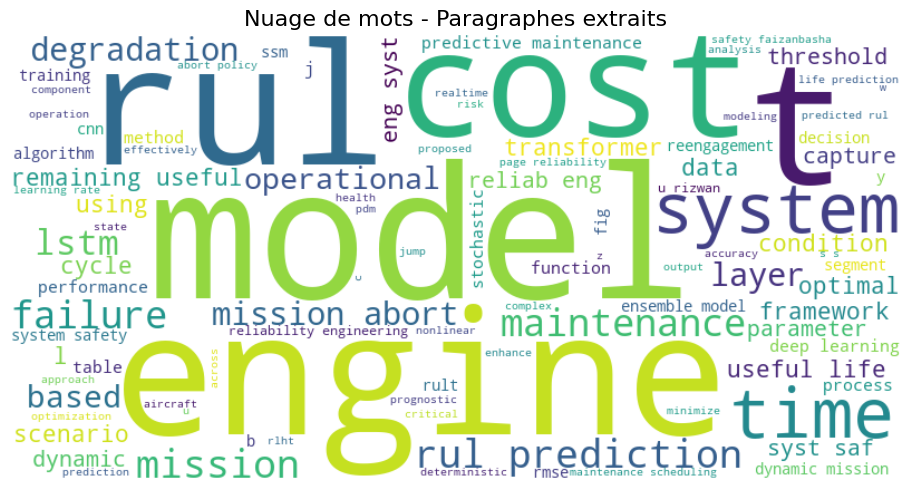

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import unidecode
import re

def load_clean_text(file_path):
    """Charge et nettoie légèrement un texte brut"""
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()

    text = unidecode.unidecode(text)  # Supprimer les accents
    text = re.sub(r'[^\w\s]', '', text)  # Supprimer la ponctuation
    text = text.lower()
    return text

def generate_wordcloud(text, title="Nuage de mots"):
    """Génère et affiche un word cloud"""
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100,
        colormap='viridis'
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# === UTILISATION ===

file_path = r"C:\Users\hp\Desktop\PFE UM6P\Code UM6P\Analyse\TextNettoyé2.txt"  # Ton fichier contenant les paragraphes
cleaned_text = load_clean_text(file_path)
generate_wordcloud(cleaned_text, title="Nuage de mots - Paragraphes extraits")
